In [1]:
from pylab import *
%matplotlib inline

# Método de Runge-Kutta de orden 4

El código desarrollado puede ser utilizado y editado en la hoja de Google Colab en el siguiente link

<br>

<a href="https://colab.research.google.com/github/lauramscs/Metodos-numericos/blob/main/Lorenzrk4.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



In [2]:
def rk4(t0, tf, x0, f, h):
    #Inicializa los arreglos de respuesta:
    #El tiempo es un arreglo de t0 a tf.
    t = np.arange(t0,tf+h,h)
    #La solución se construye con un arreglo del mismo tamaño que el tiempo y
    #luego se introduce la condición inicial.
    x = np.zeros((np.size(t), np.size(x0)))
    x[0] = x0
    
    #Ahora podemos iterar sobre los tiempos en la lista t:
    for (n, tn) in enumerate(t[:-1]):
        #Calcula la solución usando RK4:
        k1 = f(tn, x[n])
        k2 = f(tn + h/2, x[n] + h*k1/2)
        k3 = f(tn + h/2, x[n] + h*k2/2)
        k4 = f(tn + h, x[n] + h*k3)
        #La solución por RK4 se introduce al array x:
        x[n+1] = x[n] + h*(k1 + 2*k2 + 2*k3 + k4)/6
        
    #Devuelve la solución:
    return t, x

El código para resolver ecuaciones utilizando RK4 ya lo tenemos, ahora solo necesitamos definir nuestro sistema de ecuaciones.

El modelo matemático desarrollado por Lorez para la convección atmosférica consta de un sistema de tres ecuaciones diferenciales ordinarias. Las cuales elacionan las propiedades de una capa bidimensional de fluido uniformemente calentada desde abajo y enfriada desde arriba. 

$$\dot x = \sigma (y-x)$$
$$\dot y = x(\rho -z)-y $$
$$\dot x = xy - \beta z$$

En donde  $\sigma$, $\rho$ y $\beta$ cson constantes positivas. Utilizando los valores  $\sigma=10$, $\rho=28$ y $\beta=\frac{8}{3}$ el sistema muestra un comportamiento caótico.

En la siguiente celda se define el sistema de ecuaciones a resolver, el cual se le pasará al programa RK4.

In [3]:
def lorenz(t, v, r = 28.0, sigma = 10.0, b =8.0/3): 
    #Definimos la funcion lorenz que depende del tiempo t, las constantes y v  el arreglo que guarda a los parámetros x, y y z
    l = zeros_like(v) #l nos devolverá un arreglo con el sistema de ecuaciones
    l[0] = sigma*(v[1]-v[0])
    l[1] = r*v[0] - v[1] - v[0]*v[2]
    l[2] = v[0]*v[1] - b*v[2]
    return l

In [4]:
t, v = rk4(0.0, 100.0, array([0.1, 0.1, 0.1]), lorenz, 1e-1); 
#aplicamos rk4 a lorenz de t0=0 a tf=100 con la condición inicial v0=(x0=0.1, y0=0.1, z0=0.1) y un paso h=1e-1

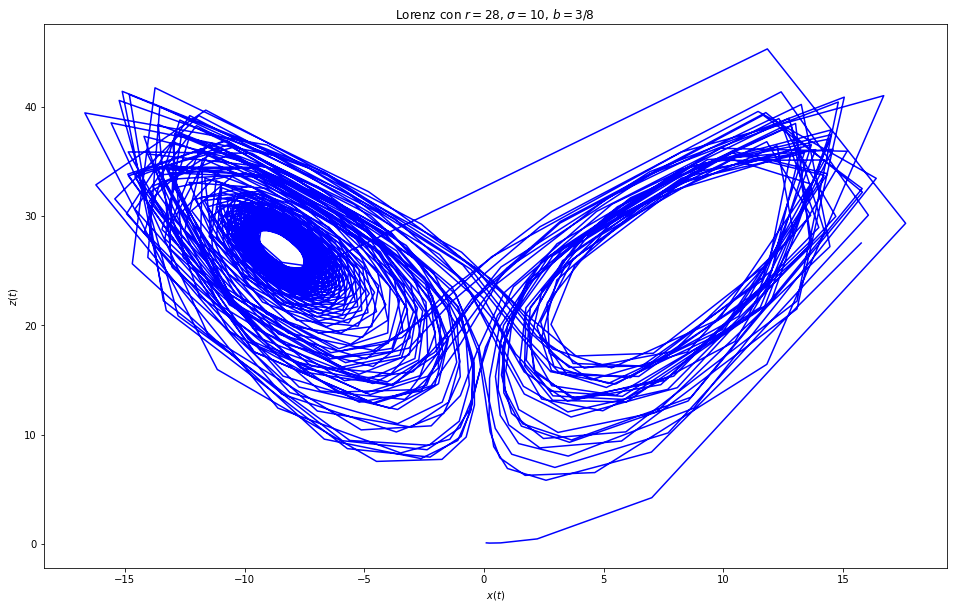

In [5]:
fig, ax = subplots(figsize = (16.18,10))

ax.set_title("Lorenz con $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$z(t)$")
ax.plot(v[:,0], v[:,2], "-b")
plt.show()

In [6]:
t, v = rk4(0.0, 100.0, array([0.1, 0.1, 0.1]), lorenz, 1e-4);
#observamos que si h es más pequeño obtenemos una mejor solución

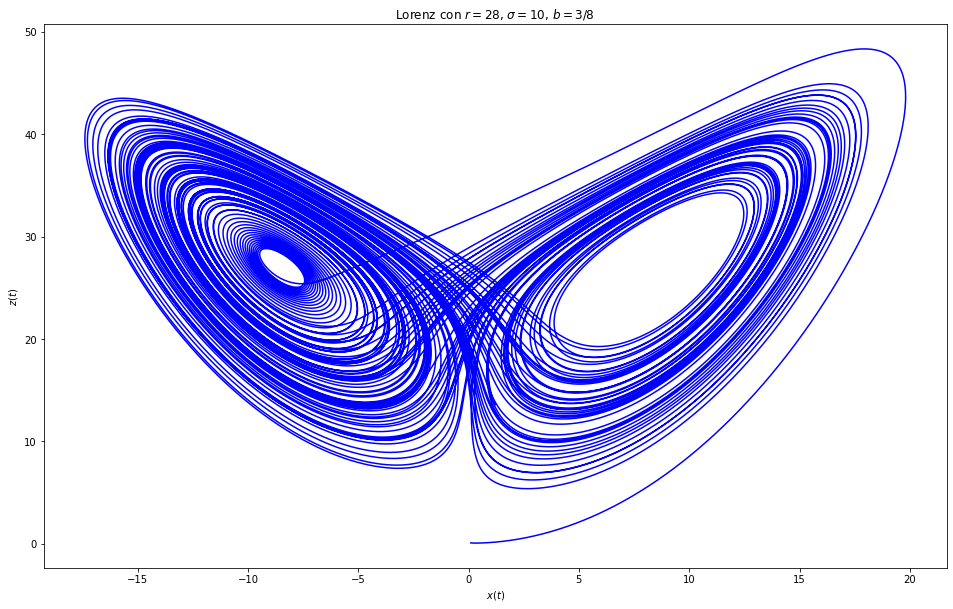

In [7]:
fig, ax = subplots(figsize = (16.18,10))

ax.set_title("Lorenz con $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$z(t)$")
ax.plot(v[:,0], v[:,2], "-b")
plt.show()

In [8]:
t, v = rk4(0.0, 100.0, array([0.1, 0.1, 0.1]), lorenz, 1e-4);

In [9]:
from mpl_toolkits import mplot3d


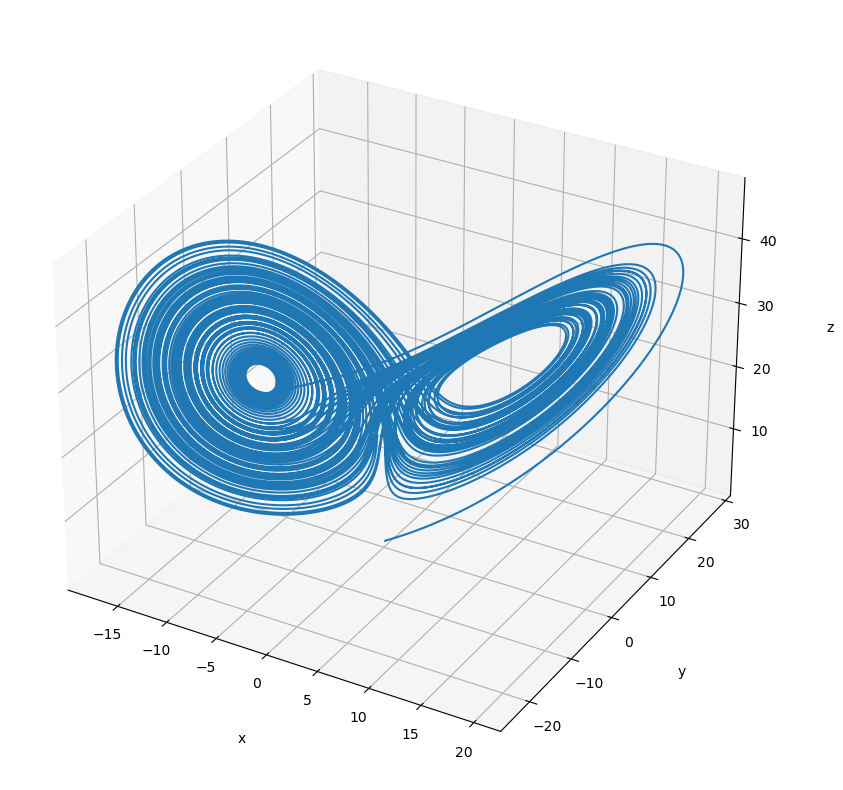

In [10]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(v[:,0], v[:,1],v[:,2])

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()